# NOAA Global Summary of Day (GSOD) Dataset from St. Louis' Lambert International Airport's station 
# (2000 - 2019) & (2020 - Mid 2020)

Inspiration : 

Tanat: EDA: Bangkok Weather (https://www.kaggle.com/code/tanatiem/eda-bangkok-weather)
Henry Goodwin: pandas_stations (https://www.kaggle.com/code/clarinerdwx/pandas-stations)
kulturkamp: NOAA_GSOD_ua_weather_notebook (https://github.com/kulturkamp/NOAA_GSOD_ua_weather_notebook)


In [51]:
#!pip install missingno

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import os
import datetime as dt
import missingno as msno


In [2]:
#load data
#lambert 2000 to 2019
lambert = pd.read_csv("/Users/billteller/Desktop/Informatics/climate_data/NCEI_requests/lambert_2000_to_2020.csv")

#lambert 2020 to 2022
lambert_recent = pd.read_csv("/Users/billteller/Desktop/Informatics/climate_data/NCEI_requests/lambert_2020_to_Aug2022.csv")

In [3]:
#lambert station 2000 - 2019
lambert.drop(lambert.tail(1).index,inplace=True) # drop last row (keep only 2019)
lambert

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,72434013994,1/1/00,34.0,0,999.9,61.0,28.0,9.9,0.00,1017.2,999.9,999.9,42.5,9.5,5.2
1,72434013994,1/2/00,48.3,0,28.9,68.0,53.6,15.9,0.00,1007.8,999.9,999.9,58.7,9.9,12.1
2,72434013994,1/3/00,38.3,110010,19.0,68.0,34.0,15.0,0.00,1008.5,999.9,999.9,41.2,4.7,7.4
3,72434013994,1/4/00,27.3,111000,23.9,43.0,24.8,19.0,0.52,1017.5,999.9,999.9,31.9,8.7,15.1
4,72434013994,1/5/00,17.1,1000,999.9,35.1,15.1,14.0,0.00,1027.8,999.9,999.9,24.9,9.4,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,72434013994,12/27/19,37.9,0,21.0,69.1,37.9,14.0,0.00,1023.2,999.9,997.4,44.7,8.7,6.0
7301,72434013994,12/28/19,43.0,110000,999.9,57.9,39.0,13.0,0.00,1019.8,999.9,991.8,46.6,4.2,9.0
7302,72434013994,12/29/19,53.0,110000,26.0,63.0,42.1,17.1,1.09,1004.0,999.9,978.8,57.4,8.3,9.8
7303,72434013994,12/30/19,28.8,11000,32.1,62.1,36.0,22.0,0.10,1005.3,999.9,979.6,40.2,9.6,16.2


In [4]:
lambert_recent

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,72434013994,1/1/20,24.0,0,22.9,57.9,28.9,15.0,0.00,1012.8,999.9,986.3,41.6,10.0,8.1
1,72434013994,1/2/20,31.0,0,22.0,57.9,29.1,14.0,0.00,1004.5,999.9,978.8,48.0,10.0,8.3
2,72434013994,1/3/20,38.8,0,999.9,57.0,37.9,11.1,0.00,1008.4,999.9,983.1,43.6,8.9,4.8
3,72434013994,1/4/20,29.8,1000,22.9,50.0,33.1,15.0,0.00,1017.1,999.9,991.7,37.2,9.5,9.5
4,72434013994,1/5/20,24.2,0,28.9,55.9,27.0,20.0,0.00,1022.0,999.9,995.2,38.7,10.0,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,72434013994,7/28/22,71.2,10010,999.9,90.0,72.0,9.9,0.90,1012.9,999.9,988.6,79.4,9.5,3.5
940,72434013994,7/29/22,62.8,0,999.9,90.0,66.9,8.9,0.27,1017.2,999.9,992.4,76.1,10.0,4.8
941,72434013994,7/30/22,59.9,0,999.9,84.0,66.9,8.9,0.00,1020.4,999.9,995.6,75.5,10.0,3.8
942,72434013994,7/31/22,65.9,0,999.9,87.1,66.9,9.9,0.00,1017.9,999.9,993.0,77.8,10.0,6.4


In [5]:
#convert Date to datetime and make it the index
#now its time series data
lambert.index = pd.to_datetime(lambert.pop('DATE'))
lambert_recent.index = pd.to_datetime(lambert_recent.pop('DATE'))

In [6]:
lambert.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7305 entries, 2000-01-01 to 2019-12-31
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  7305 non-null   int64  
 1   DEWP     7305 non-null   float64
 2   FRSHTT   7305 non-null   int64  
 3   GUST     7305 non-null   float64
 4   MAX      7305 non-null   float64
 5   MIN      7305 non-null   float64
 6   MXSPD    7305 non-null   float64
 7   PRCP     7305 non-null   float64
 8   SLP      7305 non-null   float64
 9   SNDP     7305 non-null   float64
 10  STP      7305 non-null   float64
 11  TEMP     7305 non-null   float64
 12  VISIB    7305 non-null   float64
 13  WDSP     7305 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 856.1 KB


In [7]:
lambert.describe()

,STATION,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
count,7.305000e+03,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000
mean,7.243401e+10,45.173936,17113.437509,381.251211,75.252758,48.685749,14.420780,0.120827,1024.511335,933.798371,917.705873,57.933279,9.051773,7.495565
std,0.000000e+00,18.678734,35328.097471,470.576275,233.141659,117.967423,12.579445,0.336325,257.444168,248.166899,261.665285,19.241594,1.481819,3.002737
min,7.243401e+10,-13.600000,0.000000,12.000000,10.400000,-7.100000,4.100000,0.000000,992.200000,1.200000,0.000000,-0.100000,0.700000,0.700000
25%,7.243401e+10,30.500000,0.000000,21.000000,54.000000,32.000000,11.100000,0.000000,1012.700000,999.900000,987.200000,42.400000,8.700000,5.300000
50%,7.243401e+10,46.800000,0.000000,28.000000,73.000000,48.000000,13.000000,0.000000,1016.400000,999.900000,991.800000,59.900000,9.800000,7.200000
75%,7.243401e+10,61.600000,10010.000000,999.900000,86.000000,64.000000,17.100000,0.050000,1021.200000,999.900000,998.400000,74.700000,10.000000,9.300000
max,7.243401e+10,78.600000,111110.000000,999.900000,9999.900000,9999.900000,999.900000,5.370000,9999.900000,999.900000,999.900000,96.300000,12.700000,20.500000


In [8]:
lambert_recent.describe()

,STATION,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
count,9.440000e+02,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,7.243401e+10,44.884640,7156.408898,321.692267,70.714513,47.655085,14.146504,0.137966,1026.685487,950.232521,898.366314,58.468008,9.432627,7.447458
std,0.000000e+00,18.363276,18656.250697,449.643407,19.462682,18.738112,4.600817,0.430746,292.443782,217.095214,287.095896,19.070191,1.134850,2.927642
min,7.243401e+10,-6.500000,0.000000,14.000000,8.100000,-4.000000,5.100000,0.000000,998.700000,1.200000,0.000000,2.200000,2.700000,1.200000
25%,7.243401e+10,30.000000,0.000000,21.000000,56.725000,32.825000,11.100000,0.000000,1012.400000,999.900000,985.675000,43.600000,9.400000,5.300000
50%,7.243401e+10,44.700000,0.000000,27.000000,73.000000,46.900000,14.000000,0.000000,1016.600000,999.900000,989.900000,58.700000,10.000000,7.100000
75%,7.243401e+10,61.600000,10000.000000,999.900000,87.100000,64.900000,17.100000,0.060000,1021.200000,999.900000,993.525000,75.725000,10.000000,9.225000
max,7.243401e+10,75.800000,111000.000000,999.900000,105.100000,82.000000,42.000000,7.990000,9999.900000,999.900000,999.800000,92.700000,10.000000,18.400000


In [9]:
lambert.drop(['SNDP', 'STP', 'GUST', 'VISIB'], axis=1, inplace=True)
lambert.replace(999.9, np.nan, inplace=True)
lambert.replace(9999.9, np.nan, inplace=True)
lambert

,STATION,DEWP,FRSHTT,MAX,MIN,MXSPD,PRCP,SLP,TEMP,WDSP
DATE,,,,,,,,,,
2000-01-01,72434013994,34.0,0,61.0,28.0,9.9,0.00,1017.2,42.5,5.2
2000-01-02,72434013994,48.3,0,68.0,53.6,15.9,0.00,1007.8,58.7,12.1
2000-01-03,72434013994,38.3,110010,68.0,34.0,15.0,0.00,1008.5,41.2,7.4
2000-01-04,72434013994,27.3,111000,43.0,24.8,19.0,0.52,1017.5,31.9,15.1
2000-01-05,72434013994,17.1,1000,35.1,15.1,14.0,0.00,1027.8,24.9,8.0
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,72434013994,37.9,0,69.1,37.9,14.0,0.00,1023.2,44.7,6.0
2019-12-28,72434013994,43.0,110000,57.9,39.0,13.0,0.00,1019.8,46.6,9.0
2019-12-29,72434013994,53.0,110000,63.0,42.1,17.1,1.09,1004.0,57.4,9.8


In [10]:
lambert_recent.drop(['SNDP', 'STP', 'GUST', 'VISIB'], axis=1, inplace=True)
lambert_recent.replace(999.9, np.nan, inplace=True)
lambert_recent.replace(9999.9, np.nan, inplace=True)
lambert_recent

,STATION,DEWP,FRSHTT,MAX,MIN,MXSPD,PRCP,SLP,TEMP,WDSP
DATE,,,,,,,,,,
2020-01-01,72434013994,24.0,0,57.9,28.9,15.0,0.00,1012.8,41.6,8.1
2020-01-02,72434013994,31.0,0,57.9,29.1,14.0,0.00,1004.5,48.0,8.3
2020-01-03,72434013994,38.8,0,57.0,37.9,11.1,0.00,1008.4,43.6,4.8
2020-01-04,72434013994,29.8,1000,50.0,33.1,15.0,0.00,1017.1,37.2,9.5
2020-01-05,72434013994,24.2,0,55.9,27.0,20.0,0.00,1022.0,38.7,7.8
...,...,...,...,...,...,...,...,...,...,...
2022-07-28,72434013994,71.2,10010,90.0,72.0,9.9,0.90,1012.9,79.4,3.5
2022-07-29,72434013994,62.8,0,90.0,66.9,8.9,0.27,1017.2,76.1,4.8
2022-07-30,72434013994,59.9,0,84.0,66.9,8.9,0.00,1020.4,75.5,3.8


In [11]:
lambert.describe()

,STATION,DEWP,FRSHTT,MAX,MIN,MXSPD,PRCP,SLP,TEMP,WDSP
count,7.305000e+03,7305.000000,7305.000000,7301.000000,7304.000000,7304.000000,7305.000000,7299.000000,7305.000000,7305.000000
mean,7.243401e+10,45.173936,17113.437509,69.815340,47.323316,14.285857,0.120827,1017.133292,57.933279,7.495565
std,0.000000e+00,18.678734,35328.097471,19.580575,18.884859,5.026297,0.336325,6.904612,19.241594,3.002737
min,7.243401e+10,-13.600000,0.000000,10.400000,-7.100000,4.100000,0.000000,992.200000,-0.100000,0.700000
25%,7.243401e+10,30.500000,0.000000,54.000000,32.000000,11.100000,0.000000,1012.700000,42.400000,5.300000
50%,7.243401e+10,46.800000,0.000000,73.000000,48.000000,13.000000,0.000000,1016.400000,59.900000,7.200000
75%,7.243401e+10,61.600000,10010.000000,86.000000,64.000000,17.100000,0.050000,1021.200000,74.700000,9.300000
max,7.243401e+10,78.600000,111110.000000,108.000000,84.900000,45.100000,5.370000,1045.700000,96.300000,20.500000


In [12]:
lambert_recent.describe()

,STATION,DEWP,FRSHTT,MAX,MIN,MXSPD,PRCP,SLP,TEMP,WDSP
count,9.440000e+02,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,943.000000,944.000000,944.000000
mean,7.243401e+10,44.884640,7156.408898,70.714513,47.655085,14.146504,0.137966,1017.169883,58.468008,7.447458
std,0.000000e+00,18.363276,18656.250697,19.462682,18.738112,4.600817,0.430746,6.878515,19.070191,2.927642
min,7.243401e+10,-6.500000,0.000000,8.100000,-4.000000,5.100000,0.000000,998.700000,2.200000,1.200000
25%,7.243401e+10,30.000000,0.000000,56.725000,32.825000,11.100000,0.000000,1012.400000,43.600000,5.300000
50%,7.243401e+10,44.700000,0.000000,73.000000,46.900000,14.000000,0.000000,1016.600000,58.700000,7.100000
75%,7.243401e+10,61.600000,10000.000000,87.100000,64.900000,17.100000,0.060000,1021.200000,75.725000,9.225000
max,7.243401e+10,75.800000,111000.000000,105.100000,82.000000,42.000000,7.990000,1040.200000,92.700000,18.400000


In [13]:
#maybe drop gust and visibility
#convert knots to mph

def knots_to_mph(knots):
    mph = knots * 1.150779
    return round(mph, 2)

for col in ['MXSPD','WDSP']:
    lambert[col] = lambert[col].apply(knots_to_mph)
    lambert_recent[col] = lambert_recent[col].apply(knots_to_mph)

In [14]:
lambert

,STATION,DEWP,FRSHTT,MAX,MIN,MXSPD,PRCP,SLP,TEMP,WDSP
DATE,,,,,,,,,,
2000-01-01,72434013994,34.0,0,61.0,28.0,11.39,0.00,1017.2,42.5,5.98
2000-01-02,72434013994,48.3,0,68.0,53.6,18.30,0.00,1007.8,58.7,13.92
2000-01-03,72434013994,38.3,110010,68.0,34.0,17.26,0.00,1008.5,41.2,8.52
2000-01-04,72434013994,27.3,111000,43.0,24.8,21.86,0.52,1017.5,31.9,17.38
2000-01-05,72434013994,17.1,1000,35.1,15.1,16.11,0.00,1027.8,24.9,9.21
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,72434013994,37.9,0,69.1,37.9,16.11,0.00,1023.2,44.7,6.90
2019-12-28,72434013994,43.0,110000,57.9,39.0,14.96,0.00,1019.8,46.6,10.36
2019-12-29,72434013994,53.0,110000,63.0,42.1,19.68,1.09,1004.0,57.4,11.28


In [15]:
lambert_recent

,STATION,DEWP,FRSHTT,MAX,MIN,MXSPD,PRCP,SLP,TEMP,WDSP
DATE,,,,,,,,,,
2020-01-01,72434013994,24.0,0,57.9,28.9,17.26,0.00,1012.8,41.6,9.32
2020-01-02,72434013994,31.0,0,57.9,29.1,16.11,0.00,1004.5,48.0,9.55
2020-01-03,72434013994,38.8,0,57.0,37.9,12.77,0.00,1008.4,43.6,5.52
2020-01-04,72434013994,29.8,1000,50.0,33.1,17.26,0.00,1017.1,37.2,10.93
2020-01-05,72434013994,24.2,0,55.9,27.0,23.02,0.00,1022.0,38.7,8.98
...,...,...,...,...,...,...,...,...,...,...
2022-07-28,72434013994,71.2,10010,90.0,72.0,11.39,0.90,1012.9,79.4,4.03
2022-07-29,72434013994,62.8,0,90.0,66.9,10.24,0.27,1017.2,76.1,5.52
2022-07-30,72434013994,59.9,0,84.0,66.9,10.24,0.00,1020.4,75.5,4.37


In [16]:
#make a year,month,day
# lambert['DAY'] = lambert['DATE'].dt.day
# lambert['MONTH'] = lambert['DATE'].dt.month
# lambert['YEAR'] = lambert['DATE'].dt.year
lambert = lambert[['STATION', 'FRSHTT','DEWP','MXSPD', 'WDSP', 'MIN', 'MAX', 'TEMP', 'PRCP', 'SLP']]

lambert.columns = ['Station', 'FRSHTT', 'Dewpoint','MX_wind', 'Wind_mph', 
                   'Min_temp', 'Max_temp', 'Ave_temp', 'Precip', 'Sl_pressure']

lambert_recent = lambert_recent[['STATION', 'FRSHTT','DEWP','MXSPD', 'WDSP', 'MIN', 'MAX', 'TEMP', 'PRCP', 'SLP']]

lambert_recent.columns = ['Station', 'FRSHTT', 'Dewpoint','MX_wind', 'Wind_mph', 
                   'Min_temp', 'Max_temp', 'Ave_temp', 'Precip', 'Sl_pressure']

#Sl_pressure = sea level pressure


In [17]:
lambert

,Station,FRSHTT,Dewpoint,MX_wind,Wind_mph,Min_temp,Max_temp,Ave_temp,Precip,Sl_pressure
DATE,,,,,,,,,,
2000-01-01,72434013994,0,34.0,11.39,5.98,28.0,61.0,42.5,0.00,1017.2
2000-01-02,72434013994,0,48.3,18.30,13.92,53.6,68.0,58.7,0.00,1007.8
2000-01-03,72434013994,110010,38.3,17.26,8.52,34.0,68.0,41.2,0.00,1008.5
2000-01-04,72434013994,111000,27.3,21.86,17.38,24.8,43.0,31.9,0.52,1017.5
2000-01-05,72434013994,1000,17.1,16.11,9.21,15.1,35.1,24.9,0.00,1027.8
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,72434013994,0,37.9,16.11,6.90,37.9,69.1,44.7,0.00,1023.2
2019-12-28,72434013994,110000,43.0,14.96,10.36,39.0,57.9,46.6,0.00,1019.8
2019-12-29,72434013994,110000,53.0,19.68,11.28,42.1,63.0,57.4,1.09,1004.0


In [18]:
lambert_recent

,Station,FRSHTT,Dewpoint,MX_wind,Wind_mph,Min_temp,Max_temp,Ave_temp,Precip,Sl_pressure
DATE,,,,,,,,,,
2020-01-01,72434013994,0,24.0,17.26,9.32,28.9,57.9,41.6,0.00,1012.8
2020-01-02,72434013994,0,31.0,16.11,9.55,29.1,57.9,48.0,0.00,1004.5
2020-01-03,72434013994,0,38.8,12.77,5.52,37.9,57.0,43.6,0.00,1008.4
2020-01-04,72434013994,1000,29.8,17.26,10.93,33.1,50.0,37.2,0.00,1017.1
2020-01-05,72434013994,0,24.2,23.02,8.98,27.0,55.9,38.7,0.00,1022.0
...,...,...,...,...,...,...,...,...,...,...
2022-07-28,72434013994,10010,71.2,11.39,4.03,72.0,90.0,79.4,0.90,1012.9
2022-07-29,72434013994,0,62.8,10.24,5.52,66.9,90.0,76.1,0.27,1017.2
2022-07-30,72434013994,0,59.9,10.24,4.37,66.9,84.0,75.5,0.00,1020.4


# Lowest Temperature

Ranked by Min temp

In [19]:
cold_rank = lambert.sort_values('Min_temp').head(10).reset_index(drop=False)
cold_rank.index = cold_rank.index + 1
cold_rank

,DATE,Station,FRSHTT,Dewpoint,MX_wind,Wind_mph,Min_temp,Max_temp,Ave_temp,Precip,Sl_pressure
1,2014-01-06,72434013994,1000,-13.6,31.07,18.18,-7.1,10.4,-0.1,0.62,1032.2
2,2014-01-07,72434013994,0,-8.6,18.30,9.55,-6.0,24.1,4.1,0.00,1032.0
3,2019-01-30,72434013994,1000,-12.2,23.02,13.92,-6.0,28.0,5.5,0.00,1028.5
4,2018-01-01,72434013994,0,-7.9,12.77,9.78,-6.0,12.0,1.8,0.00,1045.7
5,2018-01-02,72434013994,0,-5.4,10.24,4.95,-5.1,19.0,5.7,0.00,1043.0
6,2019-01-31,72434013994,1000,1.5,16.11,7.36,-2.9,21.9,8.5,0.03,1030.5
7,2014-02-06,72434013994,1000,-1.7,13.81,10.01,-0.9,21.9,9.3,0.01,1037.1
8,2014-02-11,72434013994,0,-5.0,8.06,4.14,-0.9,19.9,8.7,0.00,1034.7
9,2018-01-17,72434013994,1000,3.5,13.81,8.29,0.0,25.0,11.2,0.00,1040.8
10,2001-01-02,72434013994,100000,2.1,6.90,3.11,0.0,23.0,9.9,0.00,1040.4


In [20]:
cold_rank_recent = lambert_recent.sort_values('Min_temp').head(10).reset_index(drop=False)
cold_rank_recent.index = cold_rank_recent.index + 1
cold_rank_recent

,DATE,Station,FRSHTT,Dewpoint,MX_wind,Wind_mph,Min_temp,Max_temp,Ave_temp,Precip,Sl_pressure
1,2021-02-16,72434013994,1000,-4.5,14.96,9.78,-4.0,16.0,3.8,0.46,1024.4
2,2021-02-17,72434013994,1000,3.5,11.39,5.98,-2.9,19.0,11.2,0.00,1028.3
3,2021-02-15,72434013994,1000,-5.0,19.68,14.73,-0.9,8.1,2.2,0.07,1031.7
4,2021-02-14,72434013994,1000,-6.5,19.68,12.77,-0.9,10.0,3.3,0.01,1034.3
5,2021-02-19,72434013994,0,7.3,8.06,5.41,3.0,30.9,17.5,0.00,1031.6
6,2021-02-13,72434013994,1000,-0.5,16.11,12.31,3.9,19.0,7.5,0.01,1030.8
7,2020-02-14,72434013994,1000,-1.0,14.96,7.13,5.0,34.0,12.1,0.02,1036.9
8,2022-01-26,72434013994,0,1.3,11.39,5.52,5.0,27.0,14.8,0.00,1034.6
9,2022-02-05,72434013994,0,9.4,14.96,7.83,5.0,28.9,17.9,0.00,1034.0
10,2022-01-21,72434013994,0,3.9,10.24,4.95,5.0,26.1,13.5,0.00,1037.0


# Highest Temperature 


Ranked by Max temp

In [21]:
hot_rank = lambert.sort_values('Max_temp', ascending=False).head(10).reset_index(drop=False)
hot_rank.index = hot_rank.index + 1
hot_rank

,DATE,Station,FRSHTT,Dewpoint,MX_wind,Wind_mph,Min_temp,Max_temp,Ave_temp,Precip,Sl_pressure
1,2017-07-23,72434013994,10010,67.5,34.41,11.28,73.0,108.0,86.8,0.34,1009.1
2,2012-07-26,72434013994,0,65.7,17.26,11.16,82.9,108.0,91.9,0.00,1006.3
3,2012-07-25,72434013994,0,64.4,17.26,10.93,84.9,108.0,96.3,0.00,1008.9
4,2012-06-29,72434013994,0,58.2,13.81,5.75,77.0,108.0,93.1,0.00,1010.8
5,2012-06-28,72434013994,0,52.4,16.11,11.39,66.0,108.0,92.5,0.00,1011.0
6,2017-07-22,72434013994,0,70.4,19.68,13.00,82.0,108.0,93.5,0.00,1009.4
7,2012-07-07,72434013994,10010,65.3,11.39,4.03,82.9,107.1,96.0,0.00,1012.9
8,2012-07-08,72434013994,10010,69.6,24.17,8.63,79.0,107.1,87.9,0.01,1013.1
9,2012-07-24,72434013994,0,64.5,14.96,9.55,82.0,107.1,95.8,0.00,1012.9
10,2012-07-19,72434013994,10010,66.1,17.26,9.32,82.9,106.0,93.1,0.00,1011.0


In [44]:
hot_rank = lambert_recent.sort_values('Max_temp', ascending=False).head(10).reset_index(drop=False)
hot_rank.index = hot_rank.index + 1
hot_rank

,DATE,Station,FRSHTT,Dewpoint,MX_wind,Wind_mph,Min_temp,Max_temp,Ave_temp,Precip,Sl_pressure
1,2022-07-23,72434013994,0,67.0,20.83,11.85,73.9,105.1,92.7,0.00,1013.2
2,2022-07-24,72434013994,0,70.1,18.30,13.92,82.0,105.1,91.4,0.00,1011.7
3,2022-07-16,72434013994,0,63.1,19.68,13.12,78.1,102.9,90.3,0.00,1011.9
4,2022-07-17,72434013994,10000,74.2,11.39,5.18,75.0,102.9,80.0,0.09,1010.9
5,2022-07-25,72434013994,10000,65.8,14.96,6.44,72.0,102.9,78.6,0.00,1015.5
6,2022-07-05,72434013994,0,72.5,14.96,9.44,75.9,100.9,91.5,0.00,1012.7
7,2021-06-18,72434013994,0,71.2,17.26,12.31,68.0,100.9,90.1,0.00,1010.3
8,2022-07-06,72434013994,0,71.9,14.96,7.60,80.1,100.9,88.8,0.00,1011.3
9,2022-07-22,72434013994,0,65.6,12.77,3.91,72.0,100.9,87.6,0.00,1012.6
10,2022-07-20,72434013994,0,70.6,16.11,9.78,73.9,100.0,88.9,0.00,1006.2


# Highest wind speed

Ranked by MX_wind

In [23]:
wind_rank = lambert.sort_values('MX_wind', ascending=False).head(10).reset_index(drop=False)
wind_rank.index = wind_rank.index + 1
wind_rank

,DATE,Station,FRSHTT,Dewpoint,MX_wind,Wind_mph,Min_temp,Max_temp,Ave_temp,Precip,Sl_pressure
1,2017-06-14,72434013994,10010,69.4,51.90,9.78,69.8,93.0,84.8,0.00,1011.6
2,2011-02-28,72434013994,10110,40.1,48.33,12.20,35.1,64.9,45.9,0.55,1011.4
3,2006-04-02,72434013994,11010,50.8,47.87,13.23,46.0,79.0,59.1,0.09,1010.2
4,2010-10-26,72434013994,10010,50.7,47.18,19.68,59.0,77.0,68.0,0.24,993.4
5,2006-07-21,72434013994,110010,74.4,46.72,8.40,68.0,93.2,83.9,0.00,1012.2
6,2015-07-20,72434013994,110010,71.0,46.03,5.06,73.0,87.1,77.7,0.44,1010.7
7,2016-05-11,72434013994,110110,64.1,44.88,5.64,60.1,82.4,70.9,0.13,1012.8
8,2011-05-23,72434013994,10010,60.8,44.88,13.58,64.0,87.1,71.8,0.50,1005.5
9,2005-08-13,72434013994,10010,69.4,43.84,7.48,68.0,100.0,78.8,0.05,1012.0
10,2013-09-01,72434013994,10010,72.1,42.46,5.06,72.0,102.9,84.4,0.18,1007.5


In [45]:
wind_rank = lambert_recent.sort_values('MX_wind', ascending=False).head(10).reset_index(drop=False)
wind_rank.index = wind_rank.index + 1
wind_rank

,DATE,Station,FRSHTT,Dewpoint,MX_wind,Wind_mph,Min_temp,Max_temp,Ave_temp,Precip,Sl_pressure
1,2021-07-10,72434013994,110010,68.3,48.33,9.67,66.2,87.1,75.8,2.41,1011.8
2,2021-08-12,72434013994,10010,71.4,41.31,11.39,71.6,96.1,88.3,0.00,1013.1
3,2020-08-10,72434013994,10010,73.8,34.41,9.67,70.0,97.0,86.3,0.07,1013.8
4,2020-04-09,72434013994,10,31.8,33.26,14.96,46.0,84.9,56.9,0.00,1012.1
5,2022-06-17,72434013994,10010,71.5,33.26,7.71,73.0,97.0,85.2,0.27,1015.6
6,2022-03-22,72434013994,10010,47.6,33.26,16.92,52.0,77.0,57.2,0.55,1008.1
7,2021-04-07,72434013994,10010,53.9,32.22,13.00,60.8,79.0,71.2,0.00,1007.6
8,2021-08-08,72434013994,10010,69.4,32.22,11.39,72.0,93.0,83.0,0.00,1012.1
9,2020-01-18,72434013994,10000,33.0,32.22,16.69,24.1,51.1,38.4,1.51,1019.6
10,2020-11-15,72434013994,110010,40.4,32.22,20.25,37.9,59.0,53.7,1.27,1008.7


# Highest Precipitation

Ranked by Precip

In [25]:
rain_rank = lambert.sort_values('Precip', ascending=False).head(10).reset_index(drop=False)
rain_rank.index = rain_rank.index + 1
rain_rank

,DATE,Station,FRSHTT,Dewpoint,MX_wind,Wind_mph,Min_temp,Max_temp,Ave_temp,Precip,Sl_pressure
1,2015-12-27,72434013994,10010,41.2,23.02,13.58,37.9,54.0,44.3,5.37,1019.1
2,2011-06-26,72434013994,11010,69.0,29.92,7.94,66.0,86.0,75.6,4.45,1010.2
3,2003-06-26,72434013994,110010,65.9,25.32,11.16,64.4,88.0,72.2,3.74,1014.7
4,2017-04-30,72434013994,10010,55.9,23.02,11.85,51.1,73.9,59.3,3.69,1006.1
5,2008-05-26,72434013994,110010,64.8,33.26,10.01,60.1,81.0,71.3,3.64,1011.0
6,2015-08-06,72434013994,10010,68.6,17.26,8.06,71.1,86.0,75.9,3.21,1010.9
7,2010-11-25,72434013994,111000,41.8,18.30,10.47,30.9,57.9,44.3,3.10,1008.3
8,2009-06-16,72434013994,10010,67.0,27.73,7.83,68.0,82.0,73.2,3.06,1009.7
9,2016-10-20,72434013994,10010,52.7,27.73,11.39,57.0,70.0,59.3,3.03,1018.3
10,2019-07-22,72434013994,10010,66.9,24.17,8.17,66.0,91.0,77.4,3.03,1014.2


In [47]:
rain_rank = lambert_recent.sort_values('Precip', ascending=False).head(10).reset_index(drop=False)
rain_rank.index = rain_rank.index + 1
rain_rank

,DATE,Station,FRSHTT,Dewpoint,MX_wind,Wind_mph,Min_temp,Max_temp,Ave_temp,Precip,Sl_pressure
1,2022-07-26,72434013994,10010,64.9,21.86,8.29,60.1,81.0,70.4,7.99,1014.6
2,2020-08-09,72434013994,10010,70.6,29.92,11.16,70.0,91.0,79.2,3.75,1016.6
3,2020-07-30,72434013994,110010,73.4,12.77,7.13,73.0,95.0,77.5,3.39,1009.1
4,2020-01-11,72434013994,11010,40.4,28.88,11.85,32.0,61.0,43.3,2.66,1010.2
5,2021-07-10,72434013994,110010,68.3,48.33,9.67,66.2,87.1,75.8,2.41,1011.8
6,2021-03-18,72434013994,10000,41.0,23.02,14.50,42.1,55.0,44.9,2.26,1005.2
7,2022-07-27,72434013994,10010,70.9,23.02,8.63,60.1,84.0,77.2,1.98,1013.2
8,2022-03-31,72434013994,11000,34.9,23.02,15.88,37.4,53.1,41.6,1.83,1001.1
9,2020-04-29,72434013994,10010,51.7,24.17,12.20,50.0,82.9,57.6,1.72,1004.6
10,2021-09-21,72434013994,10010,63.2,20.83,10.93,63.0,88.0,71.3,1.68,1014.8


# Time Series Analysis

In [27]:
lambert_2000_2004 = lambert['2000':'2004']
lambert_2005_2010 = lambert['2005':'2010']
lambert_2011_2014 = lambert['2011':'2014']
lambert_2015_2019 = lambert['2015':'2019']

array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

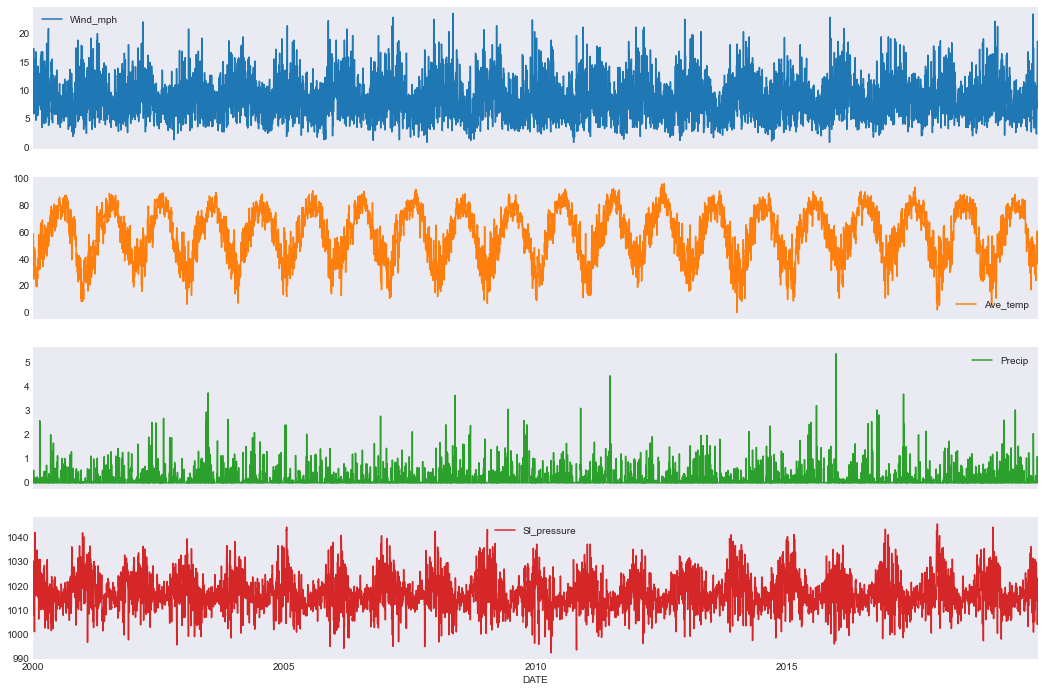

In [28]:
#time series plot
#temp, prcp, wind, slp, ?dewpoint depression?
plt.style.use('seaborn-dark')
lambert[['Wind_mph','Ave_temp','Precip','Sl_pressure']].plot(subplots=True, figsize=(18,12))

array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

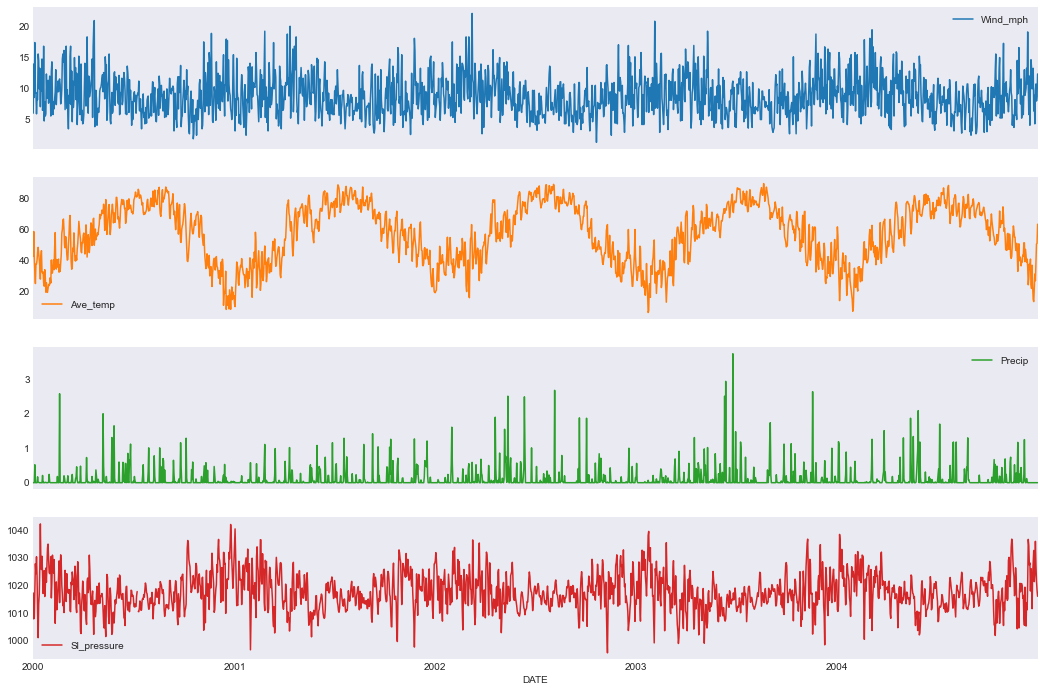

In [29]:
plt.style.use('seaborn-dark')
lambert_2000_2004[['Wind_mph','Ave_temp','Precip','Sl_pressure']].plot(subplots=True, figsize=(18,12))

array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

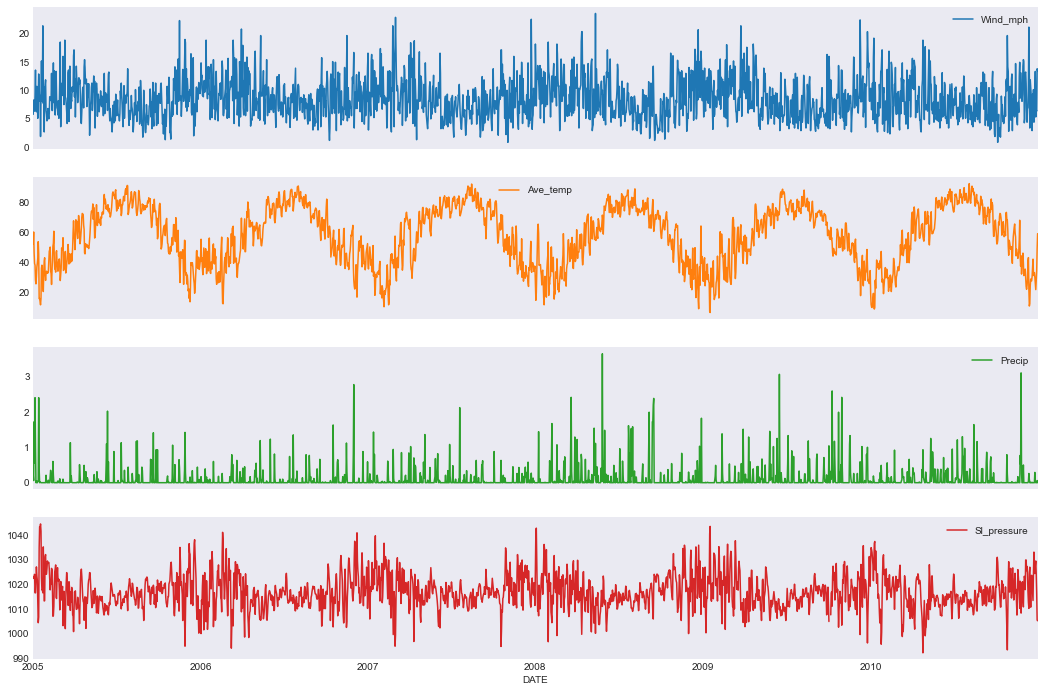

In [30]:
plt.style.use('seaborn-dark')
lambert_2005_2010[['Wind_mph','Ave_temp','Precip','Sl_pressure']].plot(subplots=True, figsize=(18,12))

array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

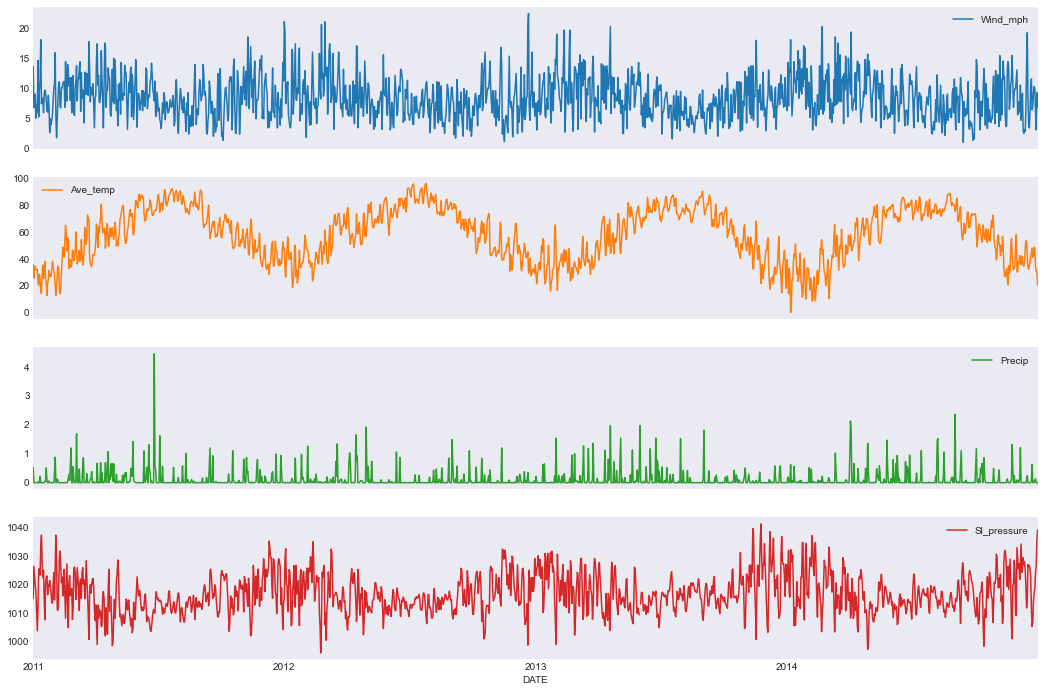

In [31]:
plt.style.use('seaborn-dark')
lambert_2011_2014[['Wind_mph','Ave_temp','Precip','Sl_pressure']].plot(subplots=True, figsize=(18,12))

array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

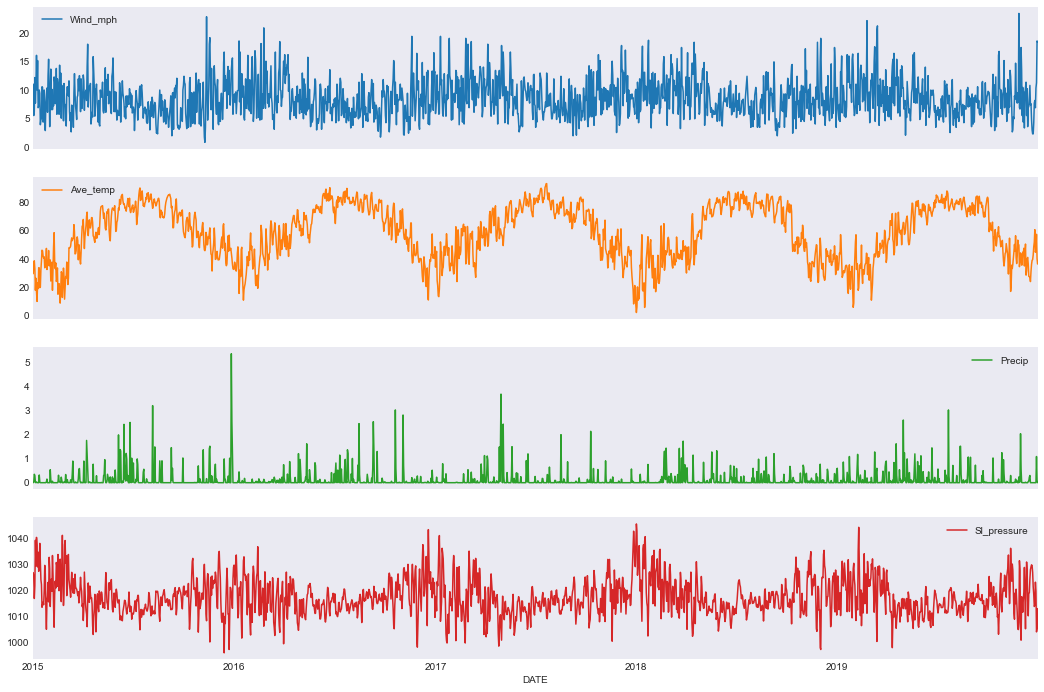

In [32]:
plt.style.use('seaborn-dark')
lambert_2015_2019[['Wind_mph','Ave_temp','Precip','Sl_pressure']].plot(subplots=True, figsize=(18,12))

array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

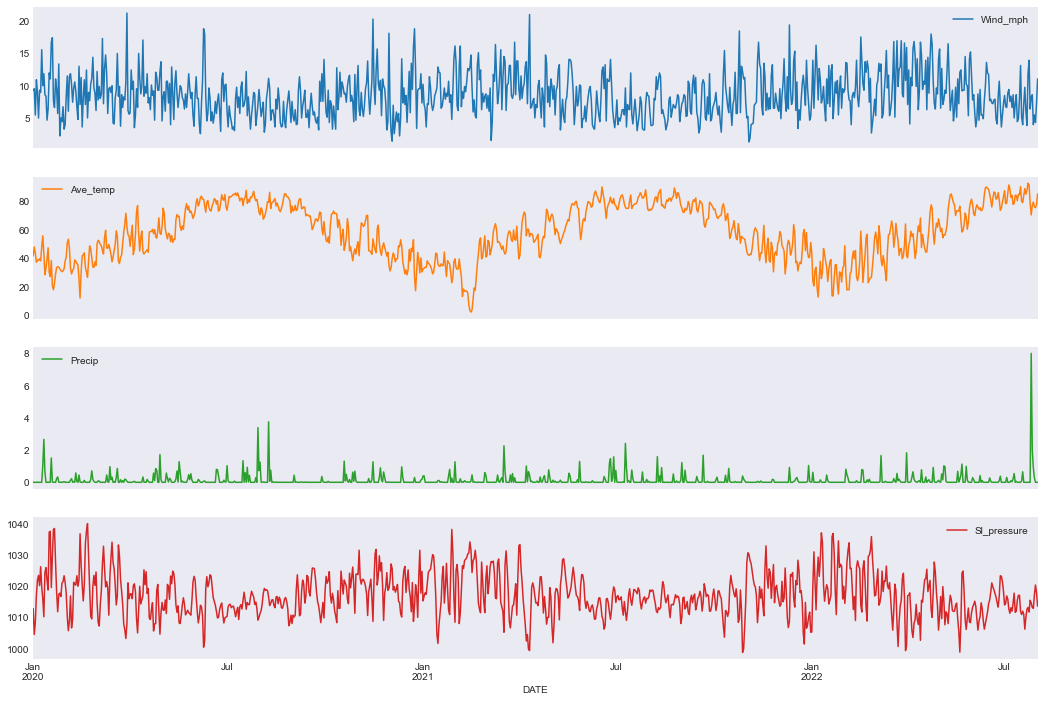

In [104]:
plt.style.use('seaborn-dark')
lambert_recent[['Wind_mph','Ave_temp','Precip','Sl_pressure']].plot(subplots=True, figsize=(18,12))

In [33]:
#add a column for dewpoint depression
# mean_dpdp = mean_temp - mean_dwpt

dewpoint_depression = lambert["Ave_temp"] - lambert["Dewpoint"]


In [34]:
dewpoint_depression

DATE
2000-01-01     8.5
2000-01-02    10.4
2000-01-03     2.9
2000-01-04     4.6
2000-01-05     7.8
              ... 
2019-12-27     6.8
2019-12-28     3.6
2019-12-29     4.4
2019-12-30    11.4
2019-12-31    12.4
Length: 7305, dtype: float64

<AxesSubplot:xlabel='DATE'>

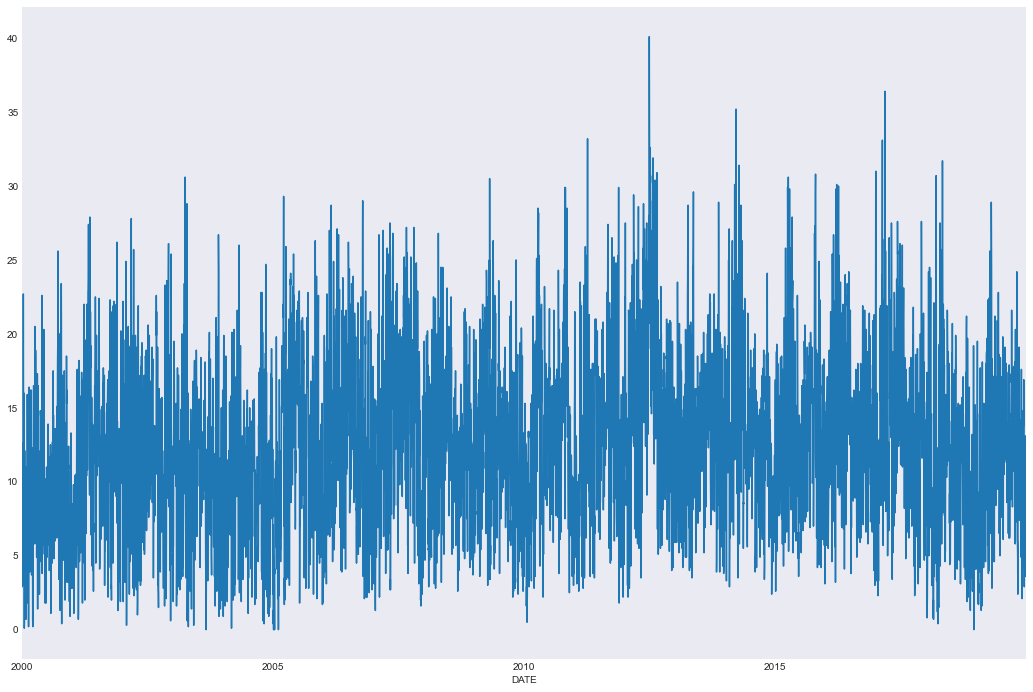

In [35]:
plt.style.use('seaborn-dark')
dewpoint_depression.plot(figsize=(18,12))


plt.show()

In [64]:
lambert = lambert.interpolate()
lambert_recent = lambert_recent.interpolate()

# Re-setting year, month, day fields
lambert['year'] = lambert.index.year
lambert['mo'] = lambert.index.month
lambert['da'] = lambert.index.day

lambert_recent['year'] = lambert_recent.index.year
lambert_recent['mo'] = lambert_recent.index.month
lambert_recent['da'] = lambert_recent.index.day

In [65]:
lambert

,Station,FRSHTT,Dewpoint,MX_wind,Wind_mph,Min_temp,Max_temp,Ave_temp,Precip,Sl_pressure,year,mo,da
DATE,,,,,,,,,,,,,
2000-01-01,72434013994,0,34.0,11.39,5.98,28.0,61.0,42.5,0.00,1017.2,2000,1,1
2000-01-02,72434013994,0,48.3,18.30,13.92,53.6,68.0,58.7,0.00,1007.8,2000,1,2
2000-01-03,72434013994,110010,38.3,17.26,8.52,34.0,68.0,41.2,0.00,1008.5,2000,1,3
2000-01-04,72434013994,111000,27.3,21.86,17.38,24.8,43.0,31.9,0.52,1017.5,2000,1,4
2000-01-05,72434013994,1000,17.1,16.11,9.21,15.1,35.1,24.9,0.00,1027.8,2000,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,72434013994,0,37.9,16.11,6.90,37.9,69.1,44.7,0.00,1023.2,2019,12,27
2019-12-28,72434013994,110000,43.0,14.96,10.36,39.0,57.9,46.6,0.00,1019.8,2019,12,28
2019-12-29,72434013994,110000,53.0,19.68,11.28,42.1,63.0,57.4,1.09,1004.0,2019,12,29


# Boxplot for Temperature

In [ ]:
#set boxplot graphs side by side for lambert and lambert_recent

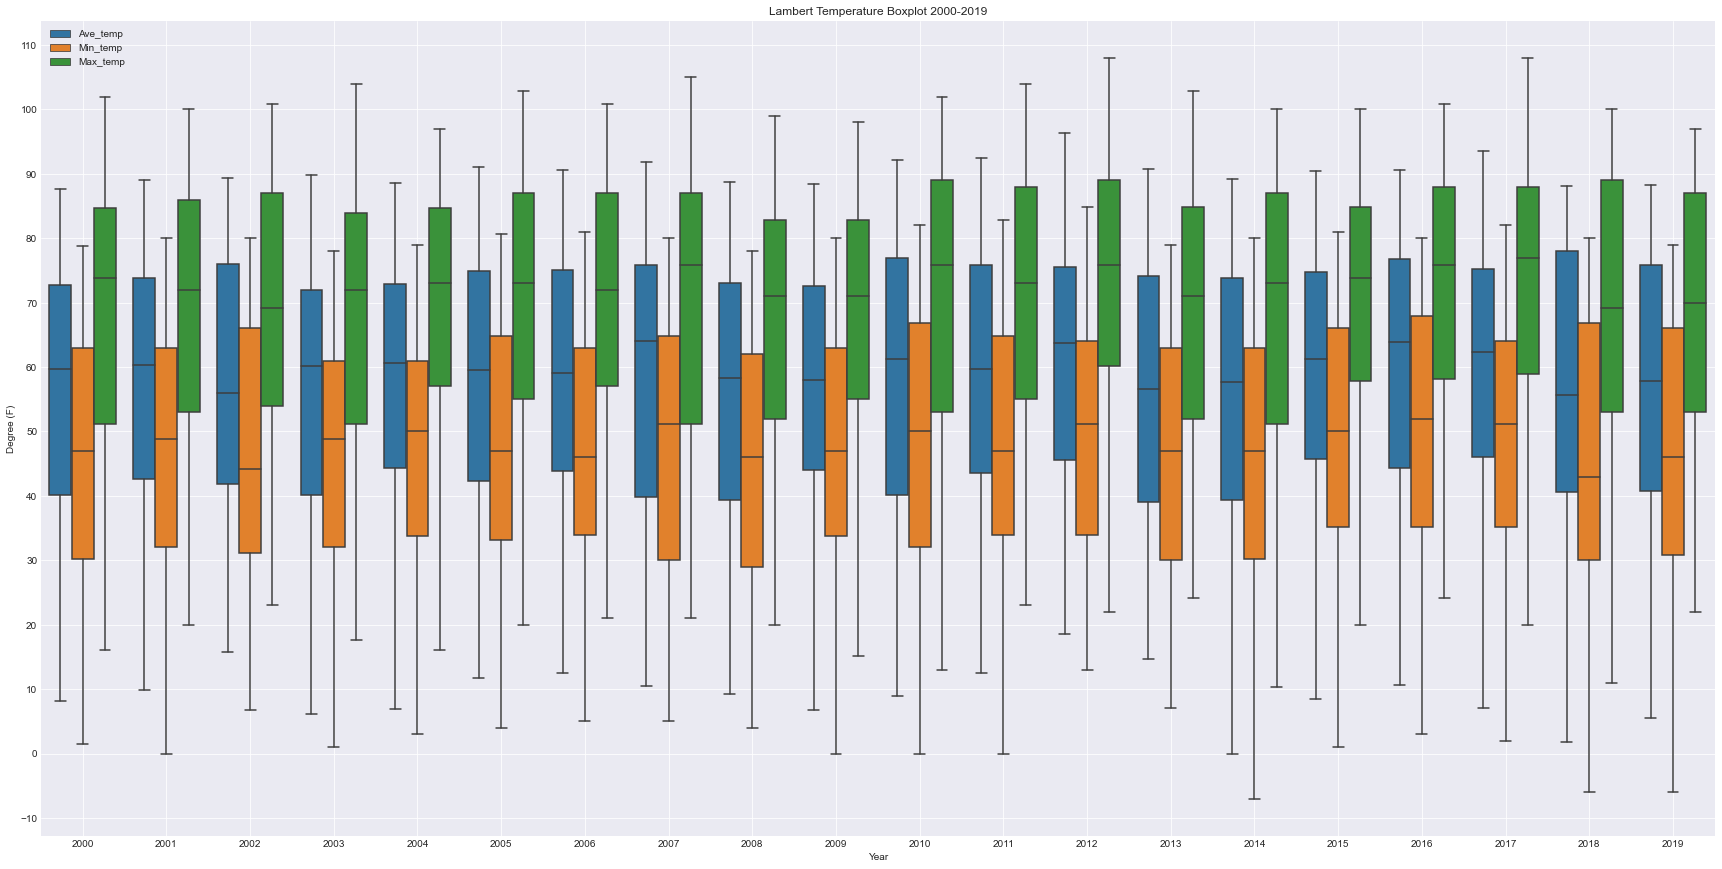

In [99]:
# melt to display
melt_data = pd.melt(lambert, id_vars = 'year', value_vars= ['Ave_temp','Min_temp','Max_temp'], 
               var_name='variable', value_name='degree', ignore_index = True)

melt_data_recent = pd.melt(lambert_recent, id_vars = 'year', value_vars= ['Ave_temp','Min_temp','Max_temp'],
                var_name='variable', value_name='degree', ignore_index = True)


plt.subplots(figsize=(30,15))

# Avg, Min, Max temp. boxplot
ax = sns.boxplot(x='year',y='degree', hue='variable', hue_order=['Ave_temp','Min_temp','Max_temp'], data=melt_data)
ax.set_ylabel('Degree (F)')
ax.set_xlabel('Year')
ax.set_yticks(np.arange(-10,120,10))
ax.set_title('Lambert Temperature Boxplot 2000-2019')
ax.legend(loc='upper left')

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

plt.show()

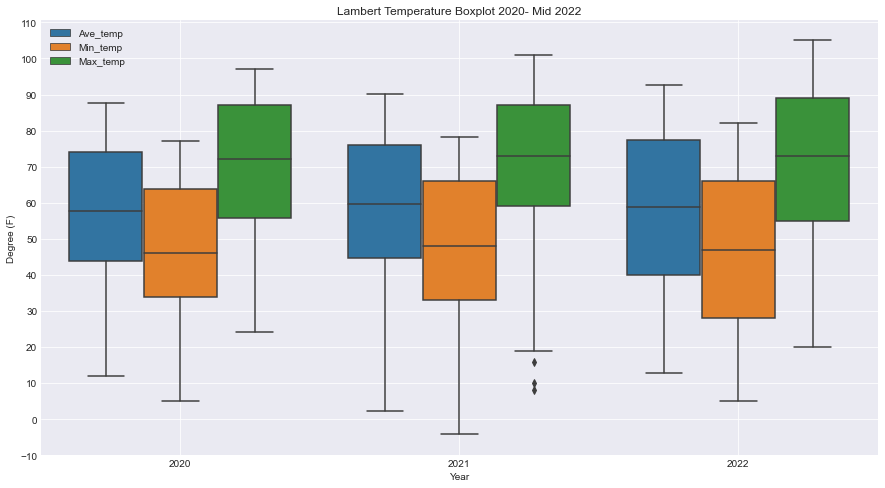

In [100]:
plt.subplots(figsize=(15,8))
# Avg, Min, Max temp. boxplot
ax = sns.boxplot(x='year',y='degree', hue='variable', hue_order=['Ave_temp','Min_temp','Max_temp'], data=melt_data_recent)
ax.set_ylabel('Degree (F)')
ax.set_xlabel('Year')
ax.set_yticks(np.arange(-10,120,10))
ax.set_title('Lambert Temperature Boxplot 2020- Mid 2022')
ax.legend(loc='upper left')

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

plt.show()

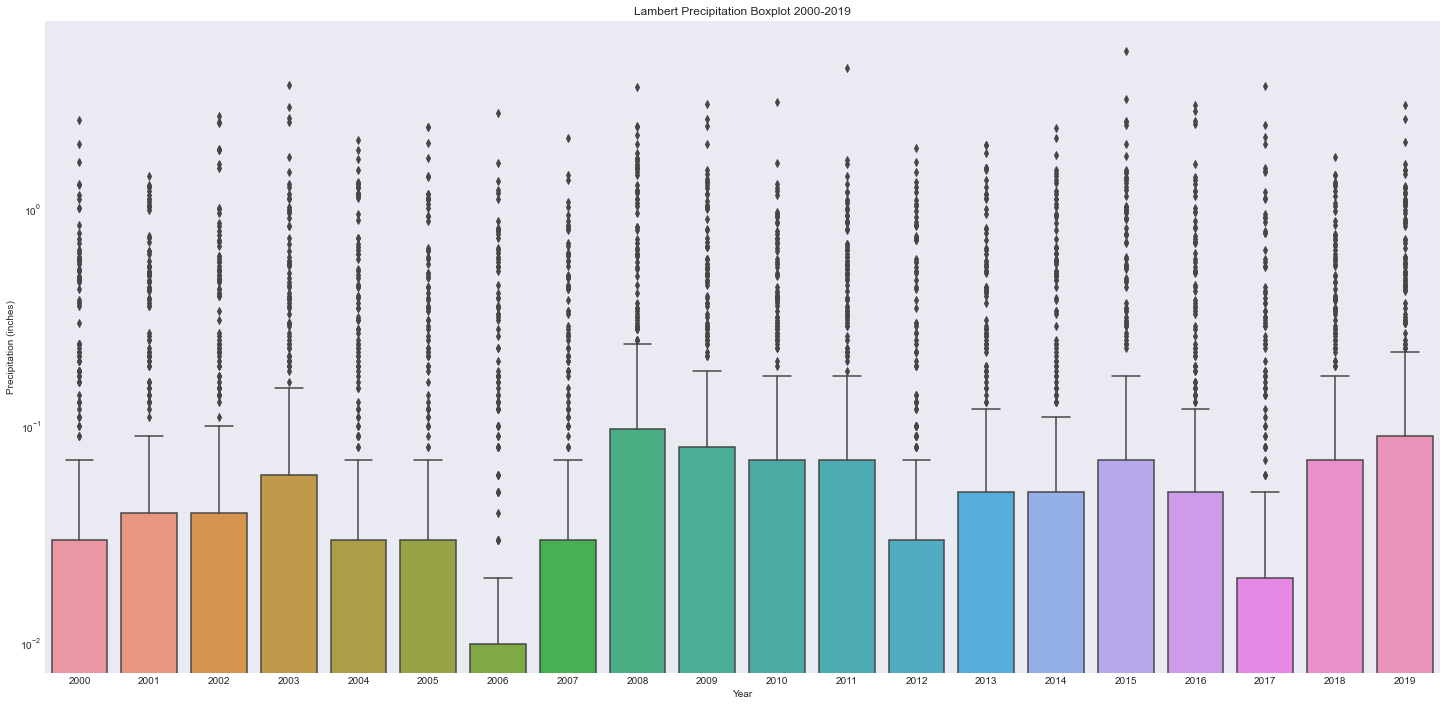

In [103]:
# Precip. boxplot
plt.subplots(figsize=(25, 12))
ax = sns.boxplot(x='year', y='Precip', data=(lambert))
ax.set_ylabel('Precipitation (inches)')
ax.set_xlabel('Year')
ax.set_title('Lambert Precipitation Boxplot 2000-2019')
ax.set_yscale('log')

In [36]:
#split FRSHTT into seperate columns

#convert column to string
#my_str = 'abcde'

# plit string without spaces into list of characters
# list_of_strings = list(my_str)
# print(list_of_strings)  # ['a', 'b', 'c', 'd', 'e']

In [37]:
cahokia = pd.read_csv("/Users/billteller/Desktop/Informatics/climate_data/NCEI_requests/cahokia_2010_to_2020.csv")

In [38]:
#cahokia station 2010-2020
cahokia

,STATION,DATE,DEWP,MXSPD,PRCP,STP,TEMP
0,72531403960,1/1/10,9.7,13.0,0.00,14.1,18.6
1,72531403960,1/2/10,4.8,15.0,0.00,17.8,12.3
2,72531403960,1/3/10,0.6,9.9,0.00,16.8,10.7
3,72531403960,1/4/10,1.4,12.0,0.00,15.7,10.1
4,72531403960,1/5/10,0.6,15.0,0.00,13.4,11.2
...,...,...,...,...,...,...,...
3648,72531403960,12/28/19,44.5,9.9,0.00,2.7,47.2
3649,72531403960,12/29/19,52.8,17.1,0.92,989.4,56.4
3650,72531403960,12/30/19,28.6,18.1,0.05,990.5,39.5
3651,72531403960,12/31/19,24.8,15.9,0.01,997.9,36.0


#lambert and cahokia stations are about 20 miles apart

In [39]:
cahokia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  3653 non-null   int64  
 1   DATE     3653 non-null   object 
 2   DEWP     3653 non-null   float64
 3   MXSPD    3653 non-null   float64
 4   PRCP     3653 non-null   float64
 5   STP      3653 non-null   float64
 6   TEMP     3653 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 199.9+ KB


In [40]:
cahokia['DATE'] = cahokia['DATE'].astype('datetime64') 

In [41]:
cahokia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  3653 non-null   int64         
 1   DATE     3653 non-null   datetime64[ns]
 2   DEWP     3653 non-null   float64       
 3   MXSPD    3653 non-null   float64       
 4   PRCP     3653 non-null   float64       
 5   STP      3653 non-null   float64       
 6   TEMP     3653 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 199.9 KB


In [42]:
cahokia

,STATION,DATE,DEWP,MXSPD,PRCP,STP,TEMP
0,72531403960,2010-01-01,9.7,13.0,0.00,14.1,18.6
1,72531403960,2010-01-02,4.8,15.0,0.00,17.8,12.3
2,72531403960,2010-01-03,0.6,9.9,0.00,16.8,10.7
3,72531403960,2010-01-04,1.4,12.0,0.00,15.7,10.1
4,72531403960,2010-01-05,0.6,15.0,0.00,13.4,11.2
...,...,...,...,...,...,...,...
3648,72531403960,2019-12-28,44.5,9.9,0.00,2.7,47.2
3649,72531403960,2019-12-29,52.8,17.1,0.92,989.4,56.4
3650,72531403960,2019-12-30,28.6,18.1,0.05,990.5,39.5
3651,72531403960,2019-12-31,24.8,15.9,0.01,997.9,36.0


In [43]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html#pandas.date_range
#use date_range to compare lambert to cahokia between 2010 - 2020